## 고용,실업률과 도서관방문자수 확인

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

### 데이터 불러오기

In [3]:
people=pd.read_excel('./시도_성별_경제활동인구_총괄_20220721094145.xlsx',header=1)

In [4]:
people_total=people[people['성별']=='계']
people_total

,행정구역(시도),성별,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (％),고용률 (%),실업률 (％),...,고용률 (%).8,실업률 (％).8,15세이상인구 (천명).9,경제활동인구 (천명).9,취업자 (천명).9,실업자 (천명).9,비경제활동인구 (천명).9,경제활동참가율 (％).9,고용률 (%).9,실업률 (％).9
0,계,계,43871,27912,26744,1167,15960,63.6,61.0,4.2,...,60.4,4.0,45148,28528,27741,788,16620,63.2,61.4,2.8
3,서울특별시,계,8562,5405,5132,272,3158,63.1,59.9,5.0,...,59.2,5.0,8525,5298,5074,224,3227,62.1,59.5,4.2
6,부산광역시,계,2995,1777,1688,89,1217,59.4,56.4,5.0,...,56.2,3.7,2948,1709,1664,44,1240,58.0,56.5,2.6
9,대구광역시,계,2107,1307,1249,58,800,62.0,59.3,4.4,...,58.2,4.6,2089,1260,1232,28,829,60.3,59.0,2.2
12,인천광역시,계,2481,1607,1523,85,873,64.8,61.4,5.3,...,61.3,5.2,2549,1620,1579,41,929,63.5,61.9,2.5
15,광주광역시,계,1260,769,741,28,491,61.0,58.8,3.7,...,58.6,3.6,1280,768,750,18,512,60.0,58.6,2.3
18,대전광역시,계,1296,794,766,29,502,61.3,59.1,3.6,...,60.2,4.2,1289,816,795,21,473,63.3,61.7,2.5
21,울산광역시,계,977,605,583,22,372,61.9,59.7,3.6,...,57.4,3.2,960,581,564,17,379,60.6,58.8,3.0
24,세종특별자치시,계,206,130,127,3,76,63.0,61.8,2.0,...,63.5,2.9,299,191,188,2,108,63.7,62.9,1.3
27,경기도,계,10717,6984,6660,324,3733,65.2,62.1,4.6,...,60.6,4.3,11764,7532,7314,218,4232,64.0,62.2,2.9


## 데이터 정제

In [5]:
people_go=people_total[['행정구역(시도)','고용률 (%)','고용률 (%).1','고용률 (%).2',
              '고용률 (%).3','고용률 (%).4','고용률 (%).5',
             '고용률 (%).6','고용률 (%).7','고용률 (%).8','고용률 (%).9']]
people_go=people_go.drop([0],axis=0)
people_go['행정구역(시도)']=['서울','부산','대구','대전','인천','광주','울산','세종','경기','강원',
                      '충북','충남','전북','전남','경북','경남','제주']
people_go=people_go.sort_values(by='행정구역(시도)')
people_go.rename(columns={'행정구역(시도)':'지역'},inplace=True)
people_go

,지역,고용률 (%),고용률 (%).1,고용률 (%).2,고용률 (%).3,고용률 (%).4,고용률 (%).5,고용률 (%).6,고용률 (%).7,고용률 (%).8,고용률 (%).9
30,강원,62.3,63.2,61.9,63.0,63.8,64.5,61.3,62.4,62.2,63.7
27,경기,62.1,62.7,62.3,62.0,61.9,62.2,60.1,60.1,60.6,62.2
48,경남,61.6,61.5,61.0,61.9,61.0,61.9,60.0,60.8,61.2,61.5
45,경북,62.4,63.4,62.1,63.1,61.4,62.9,60.1,62.0,60.9,62.8
18,광주,59.1,58.9,58.8,59.0,58.4,61.0,59.7,61.5,60.2,61.7
9,대구,59.3,58.0,58.1,59.1,57.9,58.1,54.0,57.7,58.2,59.0
12,대전,61.4,62.6,62.5,63.0,62.7,62.5,60.8,61.3,61.3,61.9
6,부산,56.4,56.3,55.5,56.5,56.1,57.6,54.3,56.1,56.2,56.5
3,서울,59.9,60.4,59.7,59.4,59.6,60.7,58.6,59.2,59.2,59.5
24,세종,61.8,61.2,61.6,62.4,62.7,63.0,62.5,63.0,63.5,62.9


In [6]:
people_sil=people_total[['행정구역(시도)','실업률 (％)','실업률 (％).1','실업률 (％).2',
              '실업률 (％).3','실업률 (％).4','실업률 (％).5',
             '실업률 (％).6','실업률 (％).7','실업률 (％).8','실업률 (％).9']]
people_sil=people_sil.drop([0],axis=0)
people_sil['행정구역(시도)']=['서울','부산','대구','대전','인천','광주','울산','세종','경기','강원',
                      '충북','충남','전북','전남','경북','경남','제주']
people_sil.sort_values(by='행정구역(시도)')
people_sil.rename(columns={'행정구역(시도)':'지역'},inplace=True)
people_sil

,지역,실업률 (％),실업률 (％).1,실업률 (％).2,실업률 (％).3,실업률 (％).4,실업률 (％).5,실업률 (％).6,실업률 (％).7,실업률 (％).8,실업률 (％).9
3,서울,5.0,4.2,5.0,4.2,5.2,3.6,5.3,4.6,5.0,4.2
6,부산,5.0,3.8,4.4,3.4,4.6,2.9,5.0,3.5,3.7,2.6
9,대구,4.4,3.9,5.4,3.8,4.6,3.0,4.1,3.9,4.6,2.2
12,대전,5.3,3.8,4.9,3.8,4.9,3.8,4.9,4.4,5.2,2.5
15,인천,3.7,2.6,4.6,3.2,4.5,2.7,4.2,4.0,3.6,2.3
18,광주,3.6,3.3,4.6,4.0,5.2,3.2,5.1,2.7,4.2,2.5
21,울산,3.6,3.4,5.9,4.7,5.2,3.2,4.2,3.7,3.2,3.0
24,세종,2.0,2.4,1.9,2.1,1.8,2.6,3.1,1.8,2.9,1.3
27,경기,4.6,3.3,4.0,3.8,4.2,3.2,4.0,3.8,4.3,2.9
30,강원,2.1,3.0,3.0,2.4,3.4,2.7,3.9,2.7,3.0,2.8


In [7]:
library_new=pd.read_excel('./library_new.xlsx')
library_data_go=pd.merge(people_go,library_new,how='inner',left_on='지역',right_on='지역')
library_data_go['고용률 평균']=library_data_go[['고용률 (%)','고용률 (%).1','고용률 (%).2',
              '고용률 (%).3','고용률 (%).4','고용률 (%).5',
             '고용률 (%).6','고용률 (%).7','고용률 (%).8','고용률 (%).9']].mean(axis=1)
library_data_go

,지역,고용률 (%),고용률 (%).1,고용률 (%).2,고용률 (%).3,고용률 (%).4,고용률 (%).5,고용률 (%).6,고용률 (%).7,고용률 (%).8,고용률 (%).9,회원등록자수_연령별회원등록_어린이,회원등록자수_연령별회원등록_청소년,회원등록자수_연령별회원등록_성인,이용자수_도서관방문자수,어린이실 유무,어린이서비스이용자수,어린이자료수,도서관수,고용률 평균
0,강원,62.3,63.2,61.9,63.0,63.8,64.5,61.3,62.4,62.2,63.7,42675,55859,465568,4527619,58,781255,1828242,60,62.83
1,경기,62.1,62.7,62.3,62.0,61.9,62.2,60.1,60.1,60.6,62.2,618668,656242,5852449,42422317,295,7473490,11882245,300,61.62
2,경남,61.6,61.5,61.0,61.9,61.0,61.9,60.0,60.8,61.2,61.5,136574,110402,836522,8402980,74,1460070,2903188,76,61.24
3,경북,62.4,63.4,62.1,63.1,61.4,62.9,60.1,62.0,60.9,62.8,173878,129252,1259115,5378902,67,1252709,2390432,70,62.11
4,광주,59.1,58.9,58.8,59.0,58.4,61.0,59.7,61.5,60.2,61.7,46685,50619,637425,3326495,24,711688,877945,24,59.83
5,대구,59.3,58.0,58.1,59.1,57.9,58.1,54.0,57.7,58.2,59.0,81962,84804,667934,5953083,43,1718737,1603679,44,57.94
6,대전,61.4,62.6,62.5,63.0,62.7,62.5,60.8,61.3,61.3,61.9,132276,79640,610662,2703163,25,976286,1084282,26,62.00
7,부산,56.4,56.3,55.5,56.5,56.1,57.6,54.3,56.1,56.2,56.5,135143,142557,1198305,7316323,48,1807586,1694082,49,56.15
8,서울,59.9,60.4,59.7,59.4,59.6,60.7,58.6,59.2,59.2,59.5,310313,403026,5538675,31288730,184,7742361,4718557,195,59.62
9,세종,61.8,61.2,61.6,62.4,62.7,63.0,62.5,63.0,63.5,62.9,11879,7044,53769,738250,13,191370,282925,13,62.46


In [8]:
library_data_go['고용률 2017년']=(library_data_go['고용률 (%)']+library_data_go['고용률 (%).1'])/2
library_data_go['고용률 2018년']=(library_data_go['고용률 (%).2']+library_data_go['고용률 (%).3'])/2
library_data_go['고용률 2019년']=(library_data_go['고용률 (%).4']+library_data_go['고용률 (%).5'])/2
library_data_go['고용률 2020년']=(library_data_go['고용률 (%).6']+library_data_go['고용률 (%).7'])/2
library_data_go['고용률 2021년']=(library_data_go['고용률 (%).8']+library_data_go['고용률 (%).9'])/2
library_data_go

,지역,고용률 (%),고용률 (%).1,고용률 (%).2,고용률 (%).3,고용률 (%).4,고용률 (%).5,고용률 (%).6,고용률 (%).7,고용률 (%).8,...,어린이실 유무,어린이서비스이용자수,어린이자료수,도서관수,고용률 평균,고용률 2017년,고용률 2018년,고용률 2019년,고용률 2020년,고용률 2021년
0,강원,62.3,63.2,61.9,63.0,63.8,64.5,61.3,62.4,62.2,...,58,781255,1828242,60,62.83,62.75,62.45,64.15,61.85,62.95
1,경기,62.1,62.7,62.3,62.0,61.9,62.2,60.1,60.1,60.6,...,295,7473490,11882245,300,61.62,62.40,62.15,62.05,60.10,61.40
2,경남,61.6,61.5,61.0,61.9,61.0,61.9,60.0,60.8,61.2,...,74,1460070,2903188,76,61.24,61.55,61.45,61.45,60.40,61.35
3,경북,62.4,63.4,62.1,63.1,61.4,62.9,60.1,62.0,60.9,...,67,1252709,2390432,70,62.11,62.90,62.60,62.15,61.05,61.85
4,광주,59.1,58.9,58.8,59.0,58.4,61.0,59.7,61.5,60.2,...,24,711688,877945,24,59.83,59.00,58.90,59.70,60.60,60.95
5,대구,59.3,58.0,58.1,59.1,57.9,58.1,54.0,57.7,58.2,...,43,1718737,1603679,44,57.94,58.65,58.60,58.00,55.85,58.60
6,대전,61.4,62.6,62.5,63.0,62.7,62.5,60.8,61.3,61.3,...,25,976286,1084282,26,62.00,62.00,62.75,62.60,61.05,61.60
7,부산,56.4,56.3,55.5,56.5,56.1,57.6,54.3,56.1,56.2,...,48,1807586,1694082,49,56.15,56.35,56.00,56.85,55.20,56.35
8,서울,59.9,60.4,59.7,59.4,59.6,60.7,58.6,59.2,59.2,...,184,7742361,4718557,195,59.62,60.15,59.55,60.15,58.90,59.35
9,세종,61.8,61.2,61.6,62.4,62.7,63.0,62.5,63.0,63.5,...,13,191370,282925,13,62.46,61.50,62.00,62.85,62.75,63.20


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
ibrary_data_go1=library_data_go[['지역','고용률 2017년','고용률 2018년','고용률 2019년','고용률 2020년','고용률 2021년']]

In [11]:
ibrary_data_go1

,지역,고용률 2017년,고용률 2018년,고용률 2019년,고용률 2020년,고용률 2021년
0,강원,62.75,62.45,64.15,61.85,62.95
1,경기,62.40,62.15,62.05,60.10,61.40
2,경남,61.55,61.45,61.45,60.40,61.35
3,경북,62.90,62.60,62.15,61.05,61.85
4,광주,59.00,58.90,59.70,60.60,60.95
5,대구,58.65,58.60,58.00,55.85,58.60
6,대전,62.00,62.75,62.60,61.05,61.60
7,부산,56.35,56.00,56.85,55.20,56.35
8,서울,60.15,59.55,60.15,58.90,59.35
9,세종,61.50,62.00,62.85,62.75,63.20


In [12]:
library_go_gr=library_data_go[['지역','이용자수_도서관방문자수','고용률 평균']]
library_go_gr

,지역,이용자수_도서관방문자수,고용률 평균
0,강원,4527619,62.83
1,경기,42422317,61.62
2,경남,8402980,61.24
3,경북,5378902,62.11
4,광주,3326495,59.83
5,대구,5953083,57.94
6,대전,2703163,62.00
7,부산,7316323,56.15
8,서울,31288730,59.62
9,세종,738250,62.46


In [13]:
sFligner=stats.fligner(library_data_go['이용자수_도서관방문자수'],library_data_go['고용률 평균'])

print('등분산성 Fligner검정 결과 =',sFligner)
print('t-검정 통계량 =%.3f, p-value=%.3f' %(sFligner))
#(g해석)
#1.p값이 0.923>0.05 이므로 귀무가설 채택
#2.귀무가설 채택 두 집단간 등분산성 만족

등분산성 Fligner검정 결과 = FlignerResult(statistic=18.114846697876114, pvalue=2.0797350123721937e-05)
t-검정 통계량 =18.115, p-value=0.000


In [14]:
library_data_sil=pd.merge(people_sil,library_new,how='inner',left_on='지역',right_on='지역')
library_data_sil['실업률 평균']=library_data_sil[['실업률 (％)','실업률 (％).1','실업률 (％).2',
              '실업률 (％).3','실업률 (％).4','실업률 (％).5',
             '실업률 (％).6','실업률 (％).7','실업률 (％).8','실업률 (％).9']].mean(axis=1)
library_sil_gr=library_data_sil[['지역','이용자수_도서관방문자수','실업률 평균']]

In [15]:
library_sil_gr

,지역,이용자수_도서관방문자수,실업률 평균
0,서울,31288730,4.63
1,부산,7316323,3.89
2,대구,5953083,3.99
3,대전,2703163,4.35
4,인천,7749321,3.54
5,광주,3326495,3.84
6,울산,3285120,4.01
7,세종,738250,2.19
8,경기,42422317,3.81
9,강원,4527619,2.90


In [16]:
library_data_sil['실업률 2017년']=(library_data_sil['실업률 (％)']+library_data_sil['실업률 (％).1'])/2
library_data_sil['실업률 2018년']=(library_data_sil['실업률 (％).2']+library_data_sil['실업률 (％).3'])/2
library_data_sil['실업률 2019년']=(library_data_sil['실업률 (％).4']+library_data_sil['실업률 (％).5'])/2
library_data_sil['실업률 2020년']=(library_data_sil['실업률 (％).6']+library_data_sil['실업률 (％).7'])/2
library_data_sil['실업률 2021년']=(library_data_sil['실업률 (％).8']+library_data_sil['실업률 (％).9'])/2
library_data_sil

,지역,실업률 (％),실업률 (％).1,실업률 (％).2,실업률 (％).3,실업률 (％).4,실업률 (％).5,실업률 (％).6,실업률 (％).7,실업률 (％).8,...,어린이실 유무,어린이서비스이용자수,어린이자료수,도서관수,실업률 평균,실업률 2017년,실업률 2018년,실업률 2019년,실업률 2020년,실업률 2021년
0,서울,5.0,4.2,5.0,4.2,5.2,3.6,5.3,4.6,5.0,...,184,7742361,4718557,195,4.63,4.60,4.60,4.40,4.95,4.60
1,부산,5.0,3.8,4.4,3.4,4.6,2.9,5.0,3.5,3.7,...,48,1807586,1694082,49,3.89,4.40,3.90,3.75,4.25,3.15
2,대구,4.4,3.9,5.4,3.8,4.6,3.0,4.1,3.9,4.6,...,43,1718737,1603679,44,3.99,4.15,4.60,3.80,4.00,3.40
3,대전,5.3,3.8,4.9,3.8,4.9,3.8,4.9,4.4,5.2,...,25,976286,1084282,26,4.35,4.55,4.35,4.35,4.65,3.85
4,인천,3.7,2.6,4.6,3.2,4.5,2.7,4.2,4.0,3.6,...,55,2269081,1812613,58,3.54,3.15,3.90,3.60,4.10,2.95
5,광주,3.6,3.3,4.6,4.0,5.2,3.2,5.1,2.7,4.2,...,24,711688,877945,24,3.84,3.45,4.30,4.20,3.90,3.35
6,울산,3.6,3.4,5.9,4.7,5.2,3.2,4.2,3.7,3.2,...,19,391482,784567,19,4.01,3.50,5.30,4.20,3.95,3.10
7,세종,2.0,2.4,1.9,2.1,1.8,2.6,3.1,1.8,2.9,...,13,191370,282925,13,2.19,2.20,2.00,2.20,2.45,2.10
8,경기,4.6,3.3,4.0,3.8,4.2,3.2,4.0,3.8,4.3,...,295,7473490,11882245,300,3.81,3.95,3.90,3.70,3.90,3.60
9,강원,2.1,3.0,3.0,2.4,3.4,2.7,3.9,2.7,3.0,...,58,781255,1828242,60,2.90,2.55,2.70,3.05,3.30,2.90


In [17]:
library_data_sil1=library_data_sil[['지역','실업률 2017년','실업률 2018년','실업률 2019년','실업률 2020년','실업률 2021년']]
library_data_sil1

,지역,실업률 2017년,실업률 2018년,실업률 2019년,실업률 2020년,실업률 2021년
0,서울,4.60,4.60,4.40,4.95,4.60
1,부산,4.40,3.90,3.75,4.25,3.15
2,대구,4.15,4.60,3.80,4.00,3.40
3,대전,4.55,4.35,4.35,4.65,3.85
4,인천,3.15,3.90,3.60,4.10,2.95
5,광주,3.45,4.30,4.20,3.90,3.35
6,울산,3.50,5.30,4.20,3.95,3.10
7,세종,2.20,2.00,2.20,2.45,2.10
8,경기,3.95,3.90,3.70,3.90,3.60
9,강원,2.55,2.70,3.05,3.30,2.90


## 데이터 검증

In [24]:
print(library_sil_gr.corr(method='pearson'))
print(library_go_gr.corr(method='pearson'))

              이용자수_도서관방문자수    실업률 평균
이용자수_도서관방문자수      1.000000  0.460955
실업률 평균            0.460955  1.000000
              이용자수_도서관방문자수    고용률 평균
이용자수_도서관방문자수      1.000000 -0.178111
고용률 평균           -0.178111  1.000000


In [26]:
print(library_sil_gr.corr(method='kendall'))
print(library_go_gr.corr(method='kendall'))

              이용자수_도서관방문자수    실업률 평균
이용자수_도서관방문자수      1.000000  0.352941
실업률 평균            0.352941  1.000000
              이용자수_도서관방문자수    고용률 평균
이용자수_도서관방문자수      1.000000 -0.338235
고용률 평균           -0.338235  1.000000


In [27]:
print(library_sil_gr.corr(method='spearman'))
print(library_go_gr.corr(method='spearman'))

              이용자수_도서관방문자수   실업률 평균
이용자수_도서관방문자수       1.00000  0.47549
실업률 평균             0.47549  1.00000
              이용자수_도서관방문자수   고용률 평균
이용자수_도서관방문자수       1.00000 -0.47549
고용률 평균            -0.47549  1.00000


## 시각화

([<matplotlib.axis.XTick at 0x18a5bf815b0>,
 [Text(0, 0, '강원'),
  Text(1, 0, '경기'),
  Text(2, 0, '경남'),
  Text(3, 0, '경북'),
  Text(4, 0, '광주'),
  Text(5, 0, '대구'),
  Text(6, 0, '대전'),
  Text(7, 0, '부산'),
  Text(8, 0, '서울'),
  Text(9, 0, '세종'),
  Text(10, 0, '울산'),
  Text(11, 0, '인천'),
  Text(12, 0, '전남'),
  Text(13, 0, '전북'),
  Text(14, 0, '제주'),
  Text(15, 0, '충남'),
  Text(16, 0, '충북')])

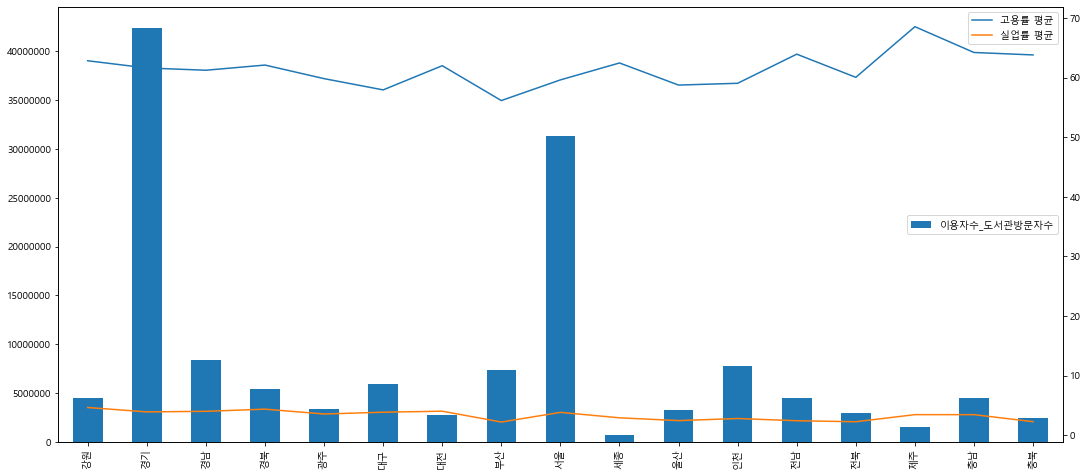

In [31]:
fig,ax0=plt.subplots(figsize=(18,8))
plt.ticklabel_format(axis='y',style='plain')
plt.rc('font',family ='Malgun Gothic',size=10)
ax1 = ax0.twinx()
library_go_gr['이용자수_도서관방문자수'].plot(kind='bar',ax=ax0)
library_total.plot(kind='line',ax=ax1)
ax0.legend(loc='center right')
ax1.legend(loc='upper right')
plt.xticks([i for i in range(0,17,1)],['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종',
                      '울산','인천','전남','전북','제주','충남','충북']
,rotation=90)

In [29]:
library_go_gr['실업률 평균']=library_sil_gr['실업률 평균']
library_go_gr['실업률 평균']

C:\Users\admin\AppData\Local\Temp\ipykernel_12408\1428741160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  library_go_gr['실업률 평균']=library_sil_gr['실업률 평균']


0     4.63
1     3.89
2     3.99
3     4.35
4     3.54
5     3.84
6     4.01
7     2.19
8     3.81
9     2.90
10    2.43
11    2.78
12    2.41
13    2.24
14    3.43
15    3.43
16    2.25
Name: 실업률 평균, dtype: float64

In [30]:
library_total=library_go_gr[['고용률 평균','실업률 평균']]